##### 머신러닝 2일차 과제_임소영
- white wine파일
- 피쳐 값을 사용자가 입력했을 때 어떤 등급의 와인인지 나오게 끔 머신러닝을 하라

전체 피드백
- 모델은 딱히 건드릴게 없다. 결국 전처리의 문제
- 이 데이터는 score를 0.7 ~ 0.8까지 올릴 수 있다.

(1) 모듈 로딩 + 데이터 준비

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [297]:
# file = '../data/winequality-white.csv'
# data = pd.read_csv(file, sep=';')
# data

In [298]:
# 결측치 확인
# data.isna().sum()

In [299]:
# # 형변환
# data['quality'] = data['quality'].astype('float64')
# data.info()

In [300]:
# data['quality'].value_counts()

In [301]:
# result = data.corr()
# result

In [302]:
# result.loc['quality']

In [303]:
# 상관계수를 뽑았을때 alcohol과 density가 가장 관련성이 높으므로 이 둘을 피쳐로 설정해보자
# 타겟 = quality
# 피쳐 = density, alcohol
file = '../data/winequality-white.csv'
wine = pd.read_csv(file, sep=';', usecols = ['density', 'alcohol', 'quality'])
wine

,density,alcohol,quality
0,1.00100,8.8,6
1,0.99400,9.5,6
2,0.99510,10.1,6
3,0.99560,9.9,6
4,0.99560,9.9,6
...,...,...,...
4893,0.99114,11.2,6
4894,0.99490,9.6,5
4895,0.99254,9.4,6
4896,0.98869,12.8,7


In [304]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

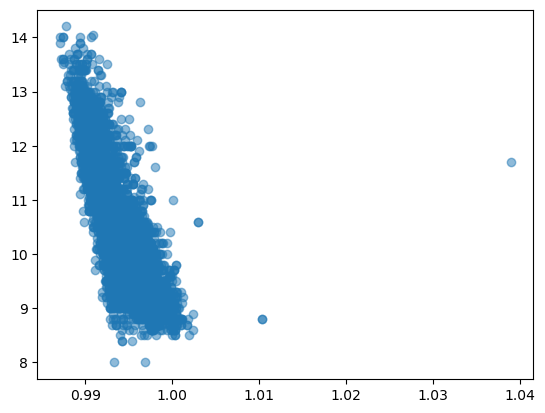

In [305]:
plt.scatter(wine['density'], wine['alcohol'], alpha = 0.5)
plt.show()

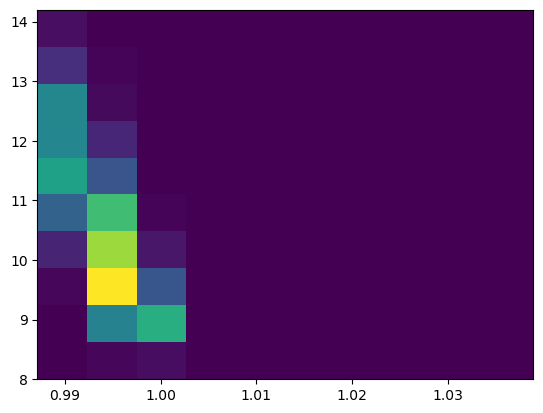

In [306]:
plt.hist2d(wine['density'], wine['alcohol'])
plt.show()

(2) 데이터 전처리

In [307]:
wine.shape

(4898, 3)

In [308]:
# 중복값 확인
wine.duplicated().sum()

1433

In [309]:
wine.drop_duplicates(keep = 'first', inplace = True)
wine.shape

(3465, 3)

(3-1) 학습용 데이터 준비 => 피쳐와 타겟을 분리함  

In [310]:
# 먼저 피쳐와 타겟을 분리함
feature = wine[['density', 'alcohol']]
feature

,density,alcohol
0,1.00100,8.8
1,0.99400,9.5
2,0.99510,10.1
3,0.99560,9.9
6,0.99490,9.6
...,...,...
4892,0.99298,9.7
4893,0.99114,11.2
4895,0.99254,9.4
4896,0.98869,12.8


In [311]:
target = wine['quality']
target

0       6
1       6
2       6
3       6
6       6
       ..
4892    5
4893    6
4895    6
4896    7
4897    6
Name: quality, Length: 3465, dtype: int64

(3-2) 학습용 데이터 준비 => 학습 / 테스트 데이터 셋 분리

In [312]:
# 학습/테스트 데이터셋을 분리시켜보자
# 학습 : 테스트 = 80 : 20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, stratify = target)

In [313]:
# 학습 및 테스트 데이터셋을 확인해보자
print('학습용 데이터셋')
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print()
print(y_train.value_counts()/y_train.shape[0])
print()
print('테스트용 데이터셋')
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")

학습용 데이터셋
X_train.shape: (2772, 2)
y_train.shape: (2772,)

quality
6    0.443723
5    0.287157
7    0.181457
4    0.043651
8    0.036797
3    0.005772
9    0.001443
Name: count, dtype: float64

테스트용 데이터셋
X_test.shape: (693, 2)
y_test.shape: (693,)


(3-3) 학습용 데이터 준비 => 피쳐 데이터의 스케일링

In [314]:
# 피쳐들의 범위가 다르니까 그것을 통일시켜보자

from sklearn.preprocessing import StandardScaler

In [315]:
scaler = StandardScaler()
scaler

StandardScaler()

In [316]:
scaler.fit(X_train)

StandardScaler()

In [317]:
#학습용 데이터 피처를 스케일링 해보자
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(2772, 2)

In [318]:
# 테스트용 데이터 피처를 스케일링 해보자
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(693, 2)

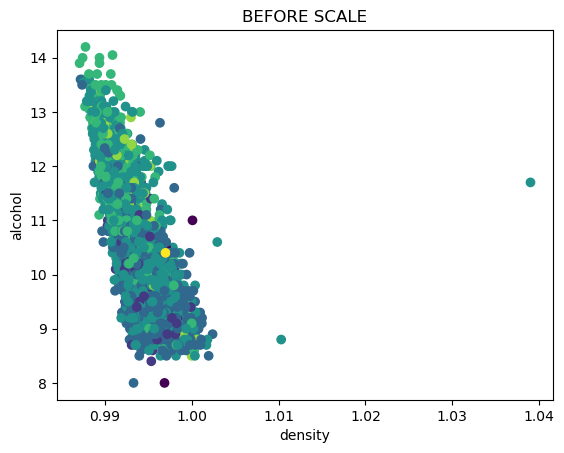

In [319]:
# 시각화 해보자 - 원본
plt.scatter(X_train['density'], X_train['alcohol'], c=y_train)
plt.xlabel('density')
plt.ylabel('alcohol')
plt.title('BEFORE SCALE')
plt.show()

In [320]:
scaled_X_train

array([[-1.53727766,  1.2796549 ],
       [ 1.23906347, -0.8472045 ],
       [-0.47740193, -0.3563908 ],
       ...,
       [-0.13077591, -0.27458851],
       [-0.37741366,  0.13442291],
       [-0.01078998,  0.29802748]])

In [321]:
scaled_X_train[:,0].max()
scaled_X_train[:,0].min()

-2.2071991081082487

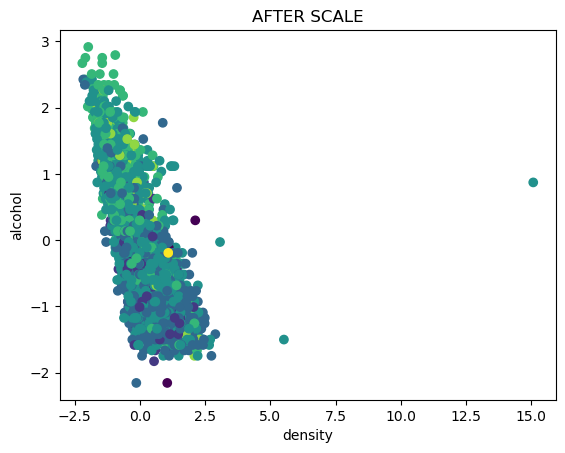

In [322]:
# 시각화 해보자 - 스케일링 후
plt.scatter(scaled_X_train[:,0], scaled_X_train[:,1], c = y_train)
plt.xlabel('density')
plt.ylabel('alcohol')
plt.title('AFTER SCALE')
plt.show()

(4) 학습 진행

In [323]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [324]:
model = KNeighborsClassifier(n_neighbors=100)
#model = KNeighborsClassifier(n_neighbors=20)
#model = SVC()
#model = LogisticRegression()
model

KNeighborsClassifier(n_neighbors=100)

In [325]:
# 학습
model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [326]:
# 테스트
model.score(scaled_X_test, y_test)

0.47619047619047616

In [327]:
# 예측
#user_data = input('와인 품종을 확인하기 위한 데이터를 입력하세요 (density, alcohol 순서로 입력: ')
user_data = '5 4'
user_list = user_data.split(' ')
user_density = float(user_list[0])
user_alcohol = float(user_list[1])
new_data = pd.DataFrame([[user_density, user_alcohol]], columns = ['density', 'alcohol'])
scaled_new_data = scaler.transform(new_data) # 피쳐를 스케일링 시켜보자
y_pre = model.predict(scaled_new_data)
y_pre

array([5], dtype=int64)

In [328]:
# 방법 : KNN 알고리즘
# max_k = scaled_X_train.shape[0]
# max_k

In [329]:
# train_scoreList = []
# test_scoreList = []
# for k in range(1, 101):
#     model = KNeighborsClassifier(n_neighbors=k)
#     # 학습 진행
#     model.fit(scaled_X_train, y_train)
#     # 점수 확인
#     train_scoreList.append(model.score(scaled_X_train, y_train))
#     test_scoreList.append(model.score(scaled_X_test, y_test))

In [330]:
# 학습 및 테스트 데이터에 대한 점수 확인
# print(f"Train Score : {train_scoreList}")
# print(f"Test Score : {test_scoreList}")

In [331]:
# K 개수에 따른 학습용/테스트용 점수 시각화
# plt.plot(train_scoreList, 'b--', label = 'Train Score')
# plt.plot(test_scoreList, 'r--', label = 'Test Score')
# plt.title('K & Score')
# plt.xlabel('K')
# plt.ylabel('Score')
# plt.legend()
# plt.show()